In [101]:
#importing all the required libraries over here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
import category_encoders as ce

#constant needed for train-test split
TRAIN_TEST_SEED = 100

### Step 1: Reading and Understanding the Data

In [102]:
housing_raw = pd.read_csv('train.csv')
housing_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [103]:
#Check the shape of the raw data
housing_raw.shape

(1460, 81)

In [104]:
#Check data distribution in the raw data
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Step 3: Data Cleansing 
#### There are 81 columns in this datasets with 3 float types, 35 int64 type, and remaining 43 of object type. 
We can also see there are a number of columns which are mostly null. Hence as part of this excercise we are going to 
drop all those columns that has a large number of null values as we don't want to polute the model with incorrect information


In [105]:
#We can see the following columns mostly has null values, hence they will be dropped from the dataset. 
#Field Name     Number of non-nulls
#----------------------------------
#LotFrontage  	1201
#Alley        	91
#MasVnrType   	588
#FireplaceQu  	770
#PoolQC       	7
#Fence        	281
#MiscFeature  	54

nullCols = ['LotFrontage','Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature']
for col in nullCols:
    housing_raw.drop(col, axis = 1, inplace = True)
    
housing_raw.shape

(1460, 74)

In [106]:
#Next there are certain other number and categorical columns that still contains values but not largerly. 
# We need to take a look at them on case by case basis. 

#Defining a common function to cleans the null values
def cleanseNulls(dataset, colName, nullFiller):
    print('######################################################################')
    print('Cleansing the data for Column Name - ', colName)
    print('---------------------------------------------------------------------')
    print("-----Before-----")
    print('data type of the column -', dataset[colName].dtype)
    print('total null value - ', dataset[colName].isna().sum())
    print('>>> VALUE COUNTS ARE')
    print(dataset[colName].value_counts())
    #fix the null values
    dataset[colName] = dataset[colName].fillna(nullFiller)
    #check the after values
    print('total null value - ', dataset[colName].isna().sum())
    print('>>> VALUE COUNTS ARE')
    print(dataset[colName].value_counts())
    print('############################### DONE #################################')

In [107]:
#Now lets start cleansing the values
#--------------------------------------------------------
#MasVnrArea  
cleanseNulls(housing_raw,'MasVnrArea', 0)

#BsmtQual  
cleanseNulls(housing_raw,'BsmtQual', 'NA')

#BsmtCond  
cleanseNulls(housing_raw,'BsmtCond', 'NA')

#BsmtExposure  
cleanseNulls(housing_raw,'BsmtExposure', 'NA')

#BsmtFinType1  
cleanseNulls(housing_raw,'BsmtFinType1', 'NA')

#BsmtFinType2  
cleanseNulls(housing_raw,'BsmtFinType2', 'NA')

#Electrical - We don't have an NA catagory here hence using Unknown
cleanseNulls(housing_raw,'Electrical', 'Unknown')

#GarageType
cleanseNulls(housing_raw,'GarageType', 'NA')

#GarageFinish
cleanseNulls(housing_raw,'GarageFinish', 'NA')

#GarageQual
cleanseNulls(housing_raw,'GarageQual', 'NA')

#GarageCond
cleanseNulls(housing_raw,'GarageCond', 'NA')

######################################################################
Cleansing the data for Column Name -  MasVnrArea
---------------------------------------------------------------------
-----Before-----
data type of the column - float64
total null value -  8
>>> VALUE COUNTS ARE
MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64
total null value -  0
>>> VALUE COUNTS ARE
MasVnrArea
0.0      869
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64
############################### DONE #################################
######################################################################
Cleansing the data for Column Name -  BsmtQual
---------------------------------------------------------------------
-----Before-----
data type o

In [108]:
#There are some more fileds where we can't decide a possible value 
# For example GarageYrBlt which is the year the garage was built in the house has 81 null values
# We cannot extrapolate this value as it denotes a specific year. Also keeping it in the dataset may polute the dataset
# Hence it is better we drop such colunms 
housing_raw.drop('GarageYrBlt', axis = 1, inplace = True)
housing_raw.shape

(1460, 73)

In [109]:
#There are some redundant columns like Condition1 and Condition2. Also based on the data dictionary there are certain
#columns that represents almost the same thing however, with some extension (e.g. OverallQual and OverallCond). 
#To keep the model simple, we can drop such redundant columns
redundant_cols = ['Condition2','OverallCond','Exterior2nd','ExterCond','BsmtFinType2']
housing_raw.drop(redundant_cols, axis = 1, inplace = True)
housing_raw.shape

(1460, 68)

In [110]:
#Our dataset is in a great shape now. Its now time to treat the categorical variables. 
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [111]:
#Check various statistical figures in the given raw data
housing_raw.describe()

,Id,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


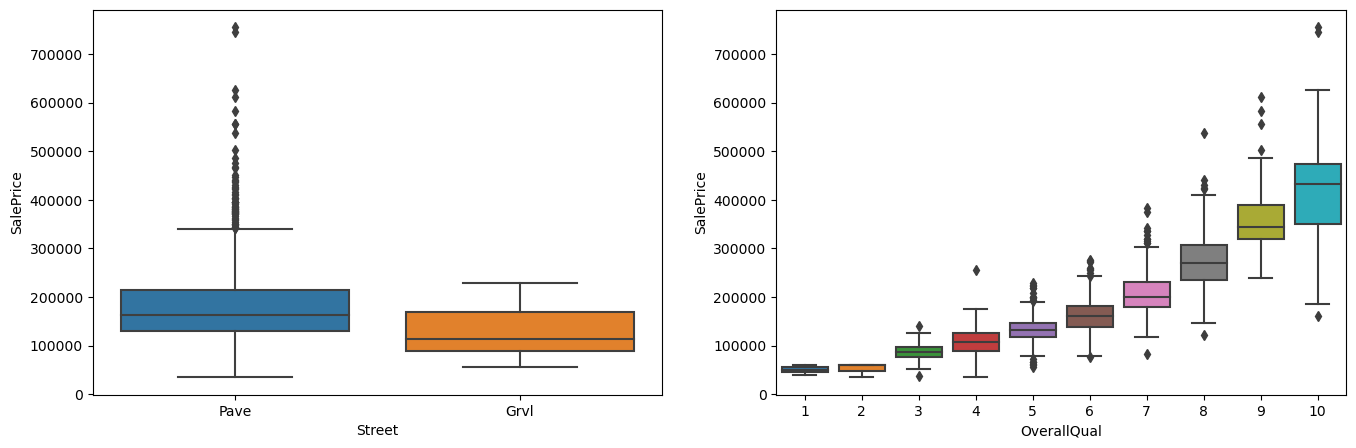

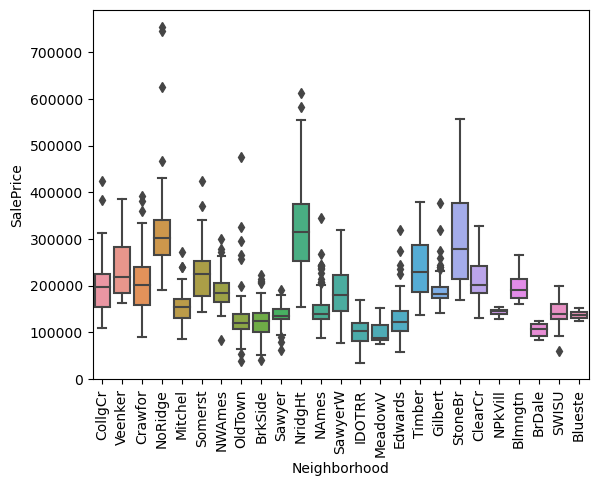

In [112]:
# Target Variable
#   SalePrice
# We can see there are several categorical variables. Picking a few of them to see the pattern
plt.figure(figsize=(25, 5))
plt.subplot(1,3,1)
sns.boxplot(x = 'Street', y = 'SalePrice', data = housing_raw)
plt.subplot(1,3,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housing_raw)
plt.show()
ax = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing_raw)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#We can clearly see a few patterns here:
# 1. Paved road access has a higer sales price
# 2. Overall quality increases the sales price
# 3. Prices at Northridge Heights, and Stone Brook seems to be highest

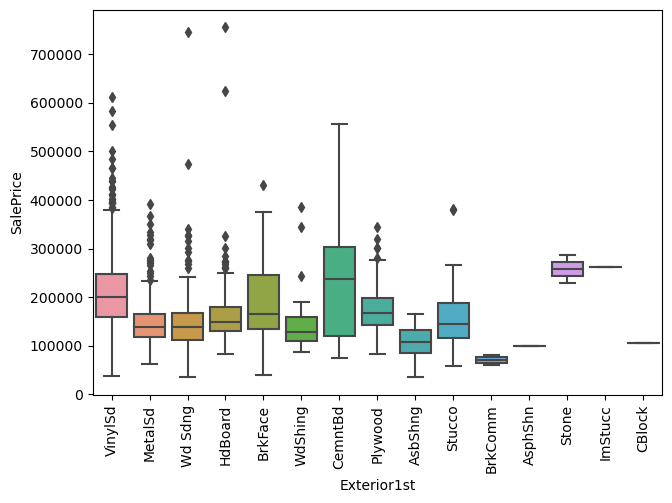

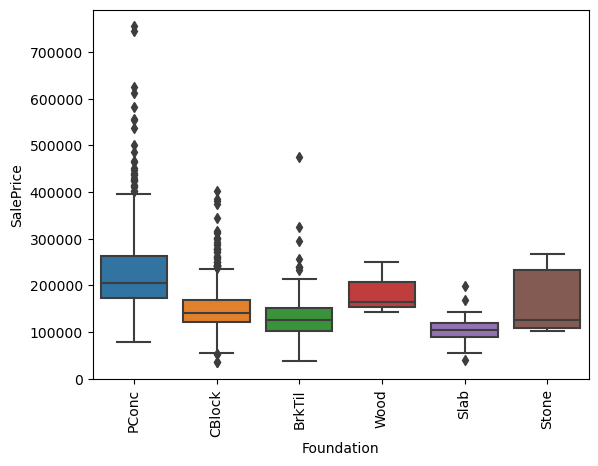

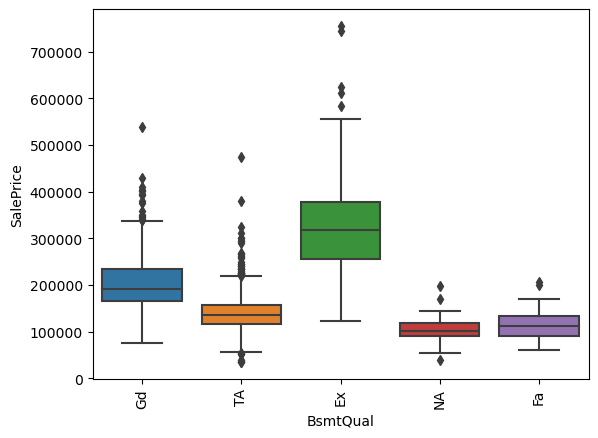

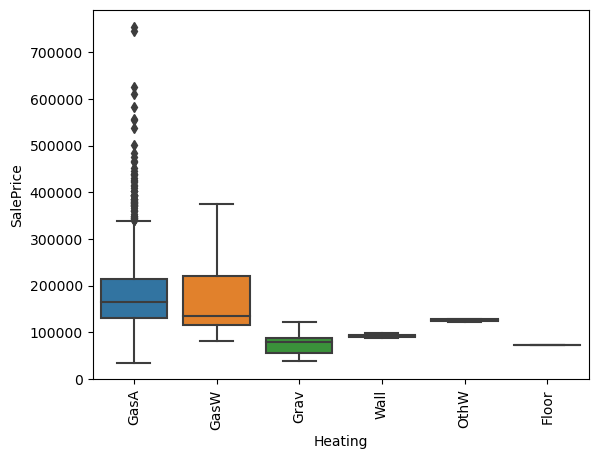

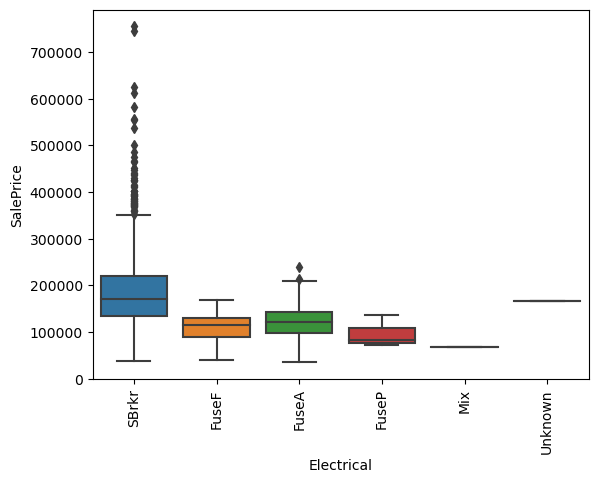

In [122]:
#Analysing few more categorical variables
plt.figure(figsize=(25, 5))
plt.subplot(1,3,1)
ax = sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing_raw)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()
ax = sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing_raw)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()
ax = sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housing_raw)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()
ax = sns.boxplot(x = 'Heating', y = 'SalePrice', data = housing_raw)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()
ax = sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing_raw)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#We can clearly see a few more patterns here:
# 1. Exterior covering on house really doesn't affect the price a lot
# 2. Foundation also doesn't seems to have a large impact
# 3. Basesment height certainly increases the price 
# 4. Houses with Gas based heating has higher sales price
# 5. Electrical system doesn't impact the sales price a lot 

### Step 4: Data Preparation 
##### We have got the following 35 categorical variables of which 2 (MSSubClass, OverallQual) are numeric and rest are text:
'MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
'Condition1','BldgType','HouseStyle','OverallQual','RoofStyle','RoofMatl','Exterior1st','ExterQual',
'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','Heating','HeatingQC','CentralAir',
'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond',
'PavedDrive','SaleType','SaleCondition'

At this stage we have two choices to treat these categorical varibales:
1. We can use pandas getdummies to generate dummy variable for each of these columns. However the problem with that will be that it will increase the dimensionality of the model which will become unmanagable. 
2. We can use some other encoding techniques to encode the text categorical variables 

Under the current situation, the option 2 seems more viable, hence I am using the category-encoders library (https://pypi.org/project/category-encoders/) to encode the text categorical variables.

In [313]:
#lets hold the data at this stage to a different variable for further usage
housing_cleansed = housing_raw.copy(deep=True)

In [315]:
housing_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [316]:
#But before we go with the encoding, we have a low hanging fruit with the field name - CentralAir. 
# This is a yes, no column which can be straight away updated as binary 
housing_cleansed['CentralAir'] = housing_cleansed['CentralAir'].replace({'N': 0, 'Y': 1})
housing_cleansed['CentralAir'] = housing_cleansed['CentralAir'].astype('int64')
housing_cleansed['CentralAir'].head()

0    1
1    1
2    1
3    1
4    1
Name: CentralAir, dtype: int64

In [317]:
#we don't need the Id column as it is of no use
housing_cleansed.drop('Id', axis = 1, inplace = True)
housing_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [318]:
#defining a function that will use the category encoder to encode the categorical variables 
def encodeCatoricalVarsWithCategoryEncoder(dataset, categoricalColumnName, targetColumnName):
    # use target encoding to encode the categorical features
    enc = ce.TargetEncoder(cols=[categoricalColumnName])
    #Fit and transform
    data_encoded = enc.fit_transform(dataset[categoricalColumnName], dataset[targetColumnName])
    #Add the encoded column
    encodedColName = categoricalColumnName+'_target'
    dataset[encodedColName]=data_encoded 
    #drop the original column 
    dataset.drop(categoricalColumnName,axis = 1, inplace = True)

In [319]:
#Now encode all the categorical columns
columnsToEncode = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                   'Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
                   'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','Heating',
                   'HeatingQC','Electrical','KitchenQual','Functional','GarageType','GarageFinish',
                   'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']
for col in columnsToEncode:
    encodeCatoricalVarsWithCategoryEncoder(housing_cleansed, col, 'SalePrice')

housing_cleansed.info()
#At this stage all the categorical variables are encoded, also we don't have any null values. 
#from here we can begin the model building process

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1460 non-null   int64  
 1   LotArea               1460 non-null   int64  
 2   OverallQual           1460 non-null   int64  
 3   YearBuilt             1460 non-null   int64  
 4   YearRemodAdd          1460 non-null   int64  
 5   MasVnrArea            1460 non-null   float64
 6   BsmtFinSF1            1460 non-null   int64  
 7   BsmtFinSF2            1460 non-null   int64  
 8   BsmtUnfSF             1460 non-null   int64  
 9   TotalBsmtSF           1460 non-null   int64  
 10  CentralAir            1460 non-null   int64  
 11  1stFlrSF              1460 non-null   int64  
 12  2ndFlrSF              1460 non-null   int64  
 13  LowQualFinSF          1460 non-null   int64  
 14  GrLivArea             1460 non-null   int64  
 15  BsmtFullBath         

In [302]:
housing_cleansed.head()

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_target,KitchenQual_target,Functional_target,GarageType_target,GarageFinish_target,GarageQual_target,GarageCond_target,PavedDrive_target,SaleType_target,SaleCondition_target
0,60,8450,7,2003,2003,196.0,706,0,150,856,...,186825.113193,212116.023891,183429.147059,202892.656322,202068.869668,187489.836003,187885.735294,186433.973881,173401.836622,175202.219533
1,20,9600,6,1976,1976,0.0,978,0,284,1262,...,186825.113193,139962.511565,183429.147059,202892.656322,202068.869668,187489.836003,187885.735294,186433.973881,173401.836622,175202.219533
2,60,11250,7,2001,2002,162.0,486,0,434,920,...,186825.113193,212116.023891,183429.147059,202892.656322,202068.869668,187489.836003,187885.735294,186433.973881,173401.836622,175202.219533
3,70,9550,7,1915,1970,0.0,216,0,540,756,...,186825.113193,212116.023891,183429.147059,134091.162791,142156.423140,187489.836003,187885.735294,186433.973881,173401.836622,146537.060693
4,60,14260,8,2000,2000,350.0,655,0,490,1145,...,186825.113193,212116.023891,183429.147059,202892.656322,202068.869668,187489.836003,187885.735294,186433.973881,173401.836622,175202.219533


### Step 5: Splitting the Data into Training and Testing Sets
#### Next we will sprint the train and test data

In [320]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(TRAIN_TEST_SEED)
housing_train, housing_test = train_test_split(housing_cleansed, train_size = 0.7, test_size = 0.3, random_state = TRAIN_TEST_SEED)

In [304]:
housing_train.shape

(1021, 67)

In [305]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 210 to 79
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1021 non-null   int64  
 1   LotArea               1021 non-null   int64  
 2   OverallQual           1021 non-null   int64  
 3   YearBuilt             1021 non-null   int64  
 4   YearRemodAdd          1021 non-null   int64  
 5   MasVnrArea            1021 non-null   float64
 6   BsmtFinSF1            1021 non-null   int64  
 7   BsmtFinSF2            1021 non-null   int64  
 8   BsmtUnfSF             1021 non-null   int64  
 9   TotalBsmtSF           1021 non-null   int64  
 10  CentralAir            1021 non-null   int64  
 11  1stFlrSF              1021 non-null   int64  
 12  2ndFlrSF              1021 non-null   int64  
 13  LowQualFinSF          1021 non-null   int64  
 14  GrLivArea             1021 non-null   int64  
 15  BsmtFullBath          1021

In [306]:
housing_train.head()

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_target,KitchenQual_target,Functional_target,GarageType_target,GarageFinish_target,GarageQual_target,GarageCond_target,PavedDrive_target,SaleType_target,SaleCondition_target
210,30,5604,5,1925,1950,0.0,468,0,396,864,...,122232.767081,139962.511565,183429.147059,103490.949750,103490.949750,103490.949750,103490.949750,186433.973881,173401.836622,175202.219533
318,60,9900,7,1993,1993,256.0,987,0,360,1347,...,186825.113193,212116.023891,183429.147059,202892.656322,202068.869668,187489.836003,187885.735294,186433.973881,173401.836622,175202.219533
239,50,8741,6,1945,1950,0.0,94,0,641,735,...,122232.767081,139962.511565,183429.147059,134091.162791,142156.423140,187489.836003,187885.735294,186433.973881,173401.836622,175202.219533
986,50,5310,6,1910,2003,0.0,0,0,485,485,...,186825.113193,212116.023891,183429.147059,202892.656322,142156.423140,126860.771933,187885.735294,186433.973881,173401.836622,175202.219533
1416,190,11340,4,1885,1950,0.0,0,0,777,777,...,186825.113193,139962.511565,183429.147059,134091.162791,142156.423140,187489.836003,187885.735294,115099.144164,173401.836622,175202.219533


In [321]:
#defining a scaling function that will use the MinMax scalar to scale the required columns 
def scaleMinMax(feature_vars, dataset):
    scaler = MinMaxScaler()
    dataset[feature_vars] = scaler.fit_transform(dataset[feature_vars])
    
#Scaling the target variable in 1000s. 
housing_train['SalePrice'] = housing_train['SalePrice'] / 1000

#Scaling the predictor variables
features_to_scale = ['LotArea','MSZoning_target','Street_target','LotShape_target','LandContour_target',
                     'Utilities_target','LotConfig_target','LandSlope_target','Neighborhood_target',
                     'Condition1_target','BldgType_target','HouseStyle_target','RoofStyle_target',
                     'RoofMatl_target','Exterior1st_target','ExterQual_target','Foundation_target',
                     'BsmtQual_target','BsmtCond_target','BsmtExposure_target','BsmtFinType1_target',
                     'Heating_target','HeatingQC_target','Electrical_target','KitchenQual_target',
                     'Functional_target','GarageType_target','GarageFinish_target','GarageQual_target',
                     'GarageCond_target','PavedDrive_target','SaleType_target','SaleCondition_target']

#scaling the predictors
scaleMinMax(features_to_scale, housing_train)
housing_train.head()

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_target,KitchenQual_target,Functional_target,GarageType_target,GarageFinish_target,GarageQual_target,GarageCond_target,PavedDrive_target,SaleType_target,SaleCondition_target
210,30,0.019306,5,1925,1950,0.0,468,0,396,864,...,0.0,0.115386,1.0,0.000000,0.000000,0.000000,0.0,1.0,0.204243,0.22795
318,60,0.039403,7,1993,1993,256.0,987,0,360,1347,...,1.0,0.453920,1.0,0.657512,0.721856,0.935287,1.0,1.0,0.204243,0.22795
239,50,0.033981,6,1945,1950,0.0,94,0,641,735,...,0.0,0.115386,1.0,0.202411,0.283135,0.935287,1.0,1.0,0.204243,0.22795
986,50,0.017931,6,1910,2003,0.0,0,0,485,485,...,1.0,0.453920,1.0,0.657512,0.283135,0.260212,1.0,1.0,0.204243,0.22795
1416,190,0.046139,4,1885,1950,0.0,0,0,777,777,...,1.0,0.115386,1.0,0.202411,0.283135,0.935287,1.0,0.0,0.204243,0.22795


In [322]:
housing_train.SalePrice.head()

210      98.0
318     260.0
239     113.0
986     117.0
1416    122.5
Name: SalePrice, dtype: float64

### Step 6.1: Building the linear model using RFE
Our next step will be be to build a training model with the numeric and dummy variables (that we generated from 
various categories). We will now do a `RFE` package from `sklearn.feature_selection`, to identify the feature
variables for the regression model

In [323]:
# we will need the target variable for all of our regression models. Hence storing that before hand
y_train = housing_train.pop('SalePrice')

# we will keep using columns from our X_train which contains our feature variables 
X_train = housing_train

In [324]:
X_train.head()

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_target,KitchenQual_target,Functional_target,GarageType_target,GarageFinish_target,GarageQual_target,GarageCond_target,PavedDrive_target,SaleType_target,SaleCondition_target
210,30,0.019306,5,1925,1950,0.0,468,0,396,864,...,0.0,0.115386,1.0,0.000000,0.000000,0.000000,0.0,1.0,0.204243,0.22795
318,60,0.039403,7,1993,1993,256.0,987,0,360,1347,...,1.0,0.453920,1.0,0.657512,0.721856,0.935287,1.0,1.0,0.204243,0.22795
239,50,0.033981,6,1945,1950,0.0,94,0,641,735,...,0.0,0.115386,1.0,0.202411,0.283135,0.935287,1.0,1.0,0.204243,0.22795
986,50,0.017931,6,1910,2003,0.0,0,0,485,485,...,1.0,0.453920,1.0,0.657512,0.283135,0.260212,1.0,1.0,0.204243,0.22795
1416,190,0.046139,4,1885,1950,0.0,0,0,777,777,...,1.0,0.115386,1.0,0.202411,0.283135,0.935287,1.0,0.0,0.204243,0.22795


In [325]:
#defining a linear regression function using statsmodels.api that can be used to perform all the linear regressions
def linearRegressionStatsModelAPI(target_variable, feature_variables):
    #train on the feature variables
    X_train_lm = sm.add_constant(feature_variables)
    lr = sm.OLS(target_variable, X_train_lm).fit()
    
    #print the parameters
    print("The linear regressoin parameters are ::- ")
    print(lr.params)
    
    #print the summary 
    print("The linear regressoin summary is ::- ")
    print(lr.summary())
    
    #predit the count using the linear regression 
    y_train_count = lr.predict(X_train_lm)
    
    #Calculate mean square terms
    mse = mean_squared_error(target_variable, y_train_count)
    r_squared = r2_score(target_variable, y_train_count)
    rmse = mse**0.5

    print('Mean_Squared_Error :', mse)
    print('r_square_value for the Model :', r_squared)
    print('Mean Squared Error for the Model :', rmse)
    
    #perform residual analysis
    fig = plt.figure()
    sns.distplot((y_train - y_train_count), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)                  
    plt.xlabel('Errors', fontsize = 18)                         
    plt.show()
    
    #return the lr for further use
    return lr

#lets also define a function to visualize the data
def linearRegressionVisualizeData(target_variable, feature_data, constant, coefficient):
    plt.scatter(feature_data, target_variable)
    plt.plot(feature_data, constant + coefficient*feature_data, 'r')
    plt.show()
    
#when we add more feature variables we need to check the VIF too so we can 
#drop any multicolinear feature varibles. This function will help us with the VIF among the feature variables
def linearRegressionMeasureVIF(features):
    vif = pd.DataFrame()
    vif['Features'] = features.columns
    vif['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

#### Model - 1 (feature - all features with ref support = true, and SalesPrice)

In [326]:
#create a new object of the LinearRegression from sklearn.linear_model
linReg = LinearRegression()

#run the fitting process
linReg.fit(X_train, y_train)

#create an RFE object with 60 steps considering we have 800 feature variables
rfe = RFE(linReg, step=60)             

#run the fit process on the rfe instance
rfe = rfe.fit(X_train, y_train)

#show the list of columns with the support field
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 2),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('YearBuilt', False, 2),
 ('YearRemodAdd', False, 2),
 ('MasVnrArea', False, 2),
 ('BsmtFinSF1', False, 2),
 ('BsmtFinSF2', False, 2),
 ('BsmtUnfSF', False, 2),
 ('TotalBsmtSF', False, 2),
 ('CentralAir', True, 1),
 ('1stFlrSF', False, 2),
 ('2ndFlrSF', False, 2),
 ('LowQualFinSF', False, 2),
 ('GrLivArea', False, 2),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 2),
 ('BedroomAbvGr', False, 2),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 2),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 2),
 ('WoodDeckSF', False, 2),
 ('OpenPorchSF', False, 2),
 ('EnclosedPorch', False, 2),
 ('3SsnPorch', False, 2),
 ('ScreenPorch', False, 2),
 ('PoolArea', False, 2),
 ('MiscVal', False, 2),
 ('MoSold', False, 2),
 ('YrSold', False, 2),
 ('MSZoning_target', False, 2),
 ('Street_target', True, 1),
 ('LotShape_target', True, 1),
 ('Lan

The linear regressoin parameters are ::- 
const                 -184.359960
LotArea                124.545177
OverallQual             13.200666
CentralAir               3.275931
BsmtFullBath            11.755851
BsmtHalfBath            10.117453
FullBath                17.885270
KitchenAbvGr            19.577575
Fireplaces              13.178799
GarageCars              11.906800
Street_target           28.414597
LotShape_target         -0.834281
LandContour_target      -2.499183
Utilities_target        67.710428
LotConfig_target        13.341809
Neighborhood_target     63.853246
Condition1_target        7.038956
BldgType_target         26.236988
HouseStyle_target        5.052594
RoofStyle_target        11.092885
RoofMatl_target        118.718413
Exterior1st_target      -3.310426
ExterQual_target         7.629198
BsmtQual_target         23.377495
BsmtExposure_target     26.954440
Heating_target           3.004773
HeatingQC_target         1.617701
KitchenQual_target      43.087245
Functi

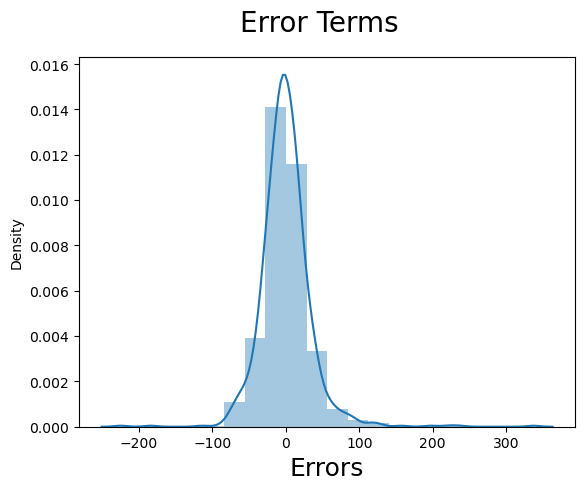

               Features     VIF
12     Utilities_target  374.13
9         Street_target  253.72
24       Heating_target  157.87
31    GarageCond_target   78.27
30    GarageQual_target   72.13
1           OverallQual   69.91
6          KitchenAbvGr   46.68
27    Functional_target   24.80
2            CentralAir   22.77
16      BldgType_target   22.64
5              FullBath   18.20
8            GarageCars   17.34
15    Condition1_target   13.19
11   LandContour_target   11.47
28    GarageType_target   11.27
29  GarageFinish_target   10.40
23  BsmtExposure_target    8.07
14  Neighborhood_target    6.60
22      BsmtQual_target    6.47
26   KitchenQual_target    6.37
25     HeatingQC_target    5.77
17    HouseStyle_target    5.47
21     ExterQual_target    4.55
19      RoofMatl_target    4.35
20   Exterior1st_target    4.00
32      SaleType_target    3.25
7            Fireplaces    2.67
0               LotArea    2.34
3          BsmtFullBath    2.28
10      LotShape_target    2.09
18     R

In [327]:
#Lets grab those support column in a feature list 
feature_cols_model01 = X_train.columns[rfe.support_]

lr01 = linearRegressionStatsModelAPI(y_train, X_train[feature_cols_model01])

# We got a very good model with:
# R-squared = 0.80
# Adjusted R-Squared = 0.80 very close to r-squared
# F-statistics = 129 
# p-value for most of the variable is close to 0, except: 
# GarageArea, EnclosedPorch, HalfBath, MiscVal, Street_target which are above .50

#check VIF for multicolinearity 
linearRegressionMeasureVIF(X_train[feature_cols_model01])
# VIFs for the following fields are very high
#  Utilities_target, Street_target, Heating_target

#Action - First We will drop Utilities_target, Street_target, Heating_target 
#         as they have high VIF indicating multicoliearity. They also have high p values
#         Lets see if this affects the model in any way

#### Model - 2 (feature - all features with ref support - drop high VIFs)

The linear regressoin parameters are ::- 
const                  -90.558246
LotArea                114.054901
OverallQual             13.170919
CentralAir               4.558771
BsmtFullBath            11.854842
BsmtHalfBath             9.031232
FullBath                18.158647
KitchenAbvGr            21.340581
Fireplaces              13.252410
GarageCars              11.720813
LotShape_target         -1.042677
LandContour_target      -1.350699
LotConfig_target        12.534745
Neighborhood_target     63.288107
Condition1_target        6.829545
BldgType_target         28.165633
HouseStyle_target        5.768772
RoofStyle_target        11.243589
RoofMatl_target        120.652363
Exterior1st_target      -3.125786
ExterQual_target         8.002093
BsmtQual_target         23.819324
BsmtExposure_target     26.944202
HeatingQC_target         1.723707
KitchenQual_target      42.820629
Functional_target        1.576646
GarageType_target       -0.470645
GarageFinish_target     -2.178584
Garage

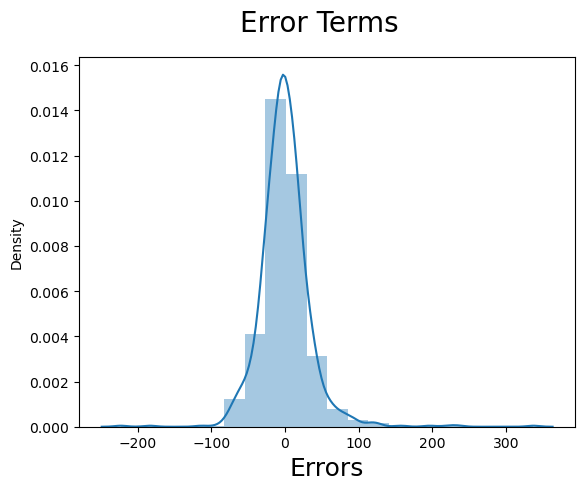

               Features    VIF
28    GarageCond_target  78.17
27    GarageQual_target  70.75
1           OverallQual  64.74
24    Functional_target  23.03
6          KitchenAbvGr  22.17
5              FullBath  18.10
2            CentralAir  17.78
8            GarageCars  16.80
14      BldgType_target  13.63
13    Condition1_target  12.19
25    GarageType_target  11.19
10   LandContour_target  11.09
26  GarageFinish_target  10.21
21  BsmtExposure_target   7.86
12  Neighborhood_target   6.53
20      BsmtQual_target   6.45
23   KitchenQual_target   6.33
22     HeatingQC_target   5.70
15    HouseStyle_target   5.33
19     ExterQual_target   4.51
17      RoofMatl_target   4.31
18   Exterior1st_target   3.99
29      SaleType_target   3.23
7            Fireplaces   2.66
3          BsmtFullBath   2.26
0               LotArea   2.20
9       LotShape_target   2.08
16     RoofStyle_target   1.36
11     LotConfig_target   1.33
4          BsmtHalfBath   1.16


In [328]:
#Lets grab those support column in a feature list 
feature_cols_model02 = X_train.columns[rfe.support_]

columns_to_drop = ['Utilities_target', 'Street_target', 'Heating_target']

feature_cols_model02 = feature_cols_model02.drop(columns_to_drop)

lr02 = linearRegressionStatsModelAPI(y_train, X_train[feature_cols_model02])

# We got a very good model with:
# R-squared = 0.80
# Adjusted R-Squared = 0.79 very close to r-squared
# F-statistics = 134 incresed  
# p-value for most of the variable is close to 0, except: 
# LotShape_target, LandContour_target, Functional_target, GarageType_target, GarageFinish_target
# GarageFinish_target, GarageQual_target

#check VIF for multicolinearity 
linearRegressionMeasureVIF(X_train[feature_cols_model02])
# VIFs for the following fields are very high
# GarageCond_target, GarageQual_target, OverallQual  

#Action - We will drop the LotShape_target, LandContour_target, Functional_target, GarageType_target, 
# GarageFinish_target, GarageFinish_target, GarageQual_target and see if this affect the model

#### Model - 3 (feature - drop columns)

The linear regressoin parameters are ::- 
const                  -87.908663
LotArea                112.546052
OverallQual             13.246713
CentralAir               4.665242
BsmtFullBath            11.855436
BsmtHalfBath             8.827307
FullBath                18.030164
KitchenAbvGr            20.998888
Fireplaces              13.003693
GarageCars              11.641691
LotConfig_target        12.094101
Neighborhood_target     63.071857
Condition1_target        6.602095
BldgType_target         27.610488
HouseStyle_target        5.516310
RoofStyle_target        11.197218
RoofMatl_target        119.959219
Exterior1st_target      -3.029049
ExterQual_target         8.242440
BsmtQual_target         23.473738
BsmtExposure_target     26.376343
KitchenQual_target      43.264876
GarageCond_target      -10.807827
SaleType_target          8.590351
dtype: float64
The linear regressoin summary is ::- 
                            OLS Regression Results                            
Dep. Varia

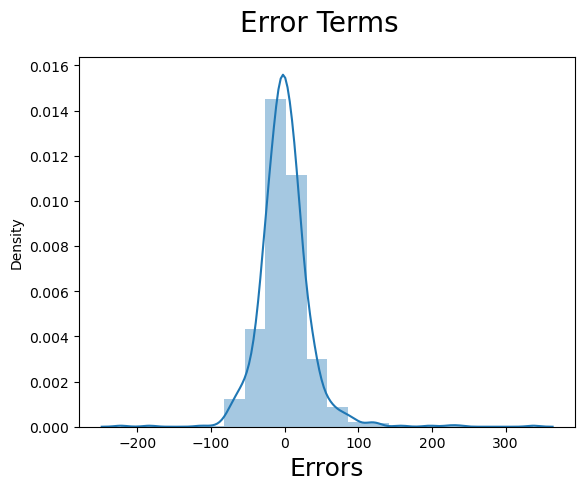

               Features    VIF
1           OverallQual  59.69
21    GarageCond_target  23.93
6          KitchenAbvGr  18.01
5              FullBath  17.23
2            CentralAir  16.83
8            GarageCars  16.09
12      BldgType_target  12.65
11    Condition1_target  12.02
19  BsmtExposure_target   7.61
10  Neighborhood_target   6.34
18      BsmtQual_target   6.33
20   KitchenQual_target   6.21
13    HouseStyle_target   5.20
17     ExterQual_target   4.34
15      RoofMatl_target   4.29
16   Exterior1st_target   3.66
22      SaleType_target   3.22
7            Fireplaces   2.54
3          BsmtFullBath   2.24
0               LotArea   2.16
14     RoofStyle_target   1.35
9      LotConfig_target   1.18
4          BsmtHalfBath   1.14


In [331]:
#Lets grab those support column in a feature list 
feature_cols_model03 = X_train.columns[rfe.support_]

columns_to_drop = ['Utilities_target', 'Street_target', 'Heating_target',
                   'LotShape_target','LandContour_target','Functional_target','GarageType_target', 
                   'GarageFinish_target','GarageFinish_target','GarageQual_target','HeatingQC_target'] 

feature_cols_model03 = feature_cols_model03.drop(columns_to_drop)

lr03 = linearRegressionStatsModelAPI(y_train, X_train[feature_cols_model03])

# We got a very good model with:
# R-squared = 0.80
# Adjusted R-Squared = 0.79 very close to r-squared
# F-statistics = 149 incresed  
# p-value for most of the variable is close to 0

#check VIF for multicolinearity 
linearRegressionMeasureVIF(X_train[feature_cols_model03])
# VIFs for the following fields are very high
#  OverallQual, GarageCond_target, KitchenAbvGr, FullBath, CentralAir, GarageCars, BldgType_target, Condition1_target

#Action - We will drop the OverallQual, GarageCond_target, KitchenAbvGr, FullBath, CentralAir, GarageCars, 
#         BldgType_target, Condition1_target and see if this affect the model

#### Model - 4 (feature - drop columns)

The linear regressoin parameters are ::- 
const                   44.792462
LotArea                139.945429
BsmtFullBath             4.442904
BsmtHalfBath             5.926627
Fireplaces              21.398728
LotConfig_target        15.421854
Neighborhood_target     92.306947
HouseStyle_target       16.051834
RoofStyle_target        13.052308
RoofMatl_target        127.893972
Exterior1st_target       4.731648
ExterQual_target        32.134232
BsmtQual_target         44.758811
BsmtExposure_target     31.071368
KitchenQual_target      66.286330
SaleType_target          7.946330
dtype: float64
The linear regressoin summary is ::- 
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     207.9
Date:                Sat, 11 May 2024   Prob 

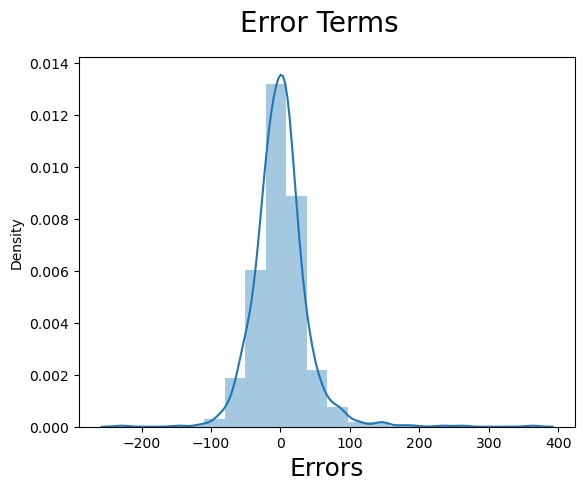

               Features   VIF
12  BsmtExposure_target  6.09
11      BsmtQual_target  5.92
13   KitchenQual_target  5.72
5   Neighborhood_target  5.59
10     ExterQual_target  3.87
6     HouseStyle_target  3.76
8       RoofMatl_target  3.56
9    Exterior1st_target  3.41
14      SaleType_target  2.98
3            Fireplaces  2.33
1          BsmtFullBath  2.12
0               LotArea  2.11
7      RoofStyle_target  1.30
4      LotConfig_target  1.17
2          BsmtHalfBath  1.13


In [332]:
#Lets grab those support column in a feature list 
feature_cols_model04 = X_train.columns[rfe.support_]

columns_to_drop = ['Utilities_target', 'Street_target', 'Heating_target',
                   'LotShape_target','LandContour_target','Functional_target','GarageType_target', 
                   'GarageFinish_target','GarageFinish_target','GarageQual_target','HeatingQC_target',
                   'OverallQual','GarageCond_target','KitchenAbvGr','FullBath','CentralAir','GarageCars', 
                   'BldgType_target','Condition1_target'] 

feature_cols_model04 = feature_cols_model04.drop(columns_to_drop)

lr04 = linearRegressionStatsModelAPI(y_train, X_train[feature_cols_model04])

# We got a very good model with:
# R-squared = 0.75 (dropped)
# Adjusted R-Squared = 0.75 very close to r-squared
# F-statistics = 207 incresed  
# p-value for most of the variable is close to 0

#check VIF for multicolinearity 
linearRegressionMeasureVIF(X_train[feature_cols_model04])

#Final Conclusion - At this stage we can see all the P-values are optimal and the VIFs are below 10. 
#                   As a result we an conclude the model4 is so far the best using linear regression

### Step 6.2: Building the linear model using Ridge regression with variaous lambdas
Our next step will be be to build a training model with the numeric and dummy variables (that we generated from 
various categories). We will use Ridge regression model for various lambdas and see the effect on the model. 

In [333]:
def ridgeRegressionModel(train_dataset, alphaVal, columns, target):
    print('---------------------------------------------')
    print('Alpha Value : ', alphaVal)
    print('---------------------------------------------')
    ridgereg = Ridge(alpha = alphaVal)
    ridgereg.fit(train_dataset[columns], target)

    #determine predicted value
    y_pred = ridgereg.predict(train_dataset[columns])

    #compute mse, r2, and coeffs 
    mse = mean_squared_error(target, y_pred)
    ridge_coeffs = ridgereg.coef_
    r_squared = r2_score(target, y_pred)

    print('Mean_Squared_Error :', mse)
    print('r_square_value for the Model :', r_squared)

    print('Ridge coefficient :')
    print('---------------------------------------------')
    coeffienct_df = pd.DataFrame({'Feature': columns, 'Coefficient': ridge_coeffs})
    coeffienct_df = coeffienct_df.sort_values(by = 'Coefficient', ascending = False)

    pd.set_option('display.max_rows', None)
    print(coeffienct_df)

    #perform residual analysis
    print('Residual of Errors')
    print('---------------------------------------------')
    fig = plt.figure()
    sns.distplot((target - y_pred), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)                  
    plt.xlabel('Errors', fontsize = 18)  
    plt.title('Residual of Errors')
    plt.show()
    
    return ridgereg

def ridgeRegressionModelMultiAlpha(train_dataset, beginAlpha, multiplier, maxAlpha, columns, target):
    #define a new dataframe
    regDf = pd.DataFrame(columns=['Alpha','R-Squared','MSE','RMSE'])
    
    #now loop thru various alphas 
    alphaVal = beginAlpha
    while alphaVal <= maxAlpha:
        #perform ridge
        ridgereg = Ridge(alpha = alphaVal)
        ridgereg.fit(train_dataset[columns], target)
        
        #determine predicted value
        y_pred = ridgereg.predict(train_dataset[columns])
        
        #compute the scores
        mse = mean_squared_error(target, y_pred)
        r_squared = r2_score(target, y_pred)
        rmse = mse**0.5
        
        #store the results
        data = {'Alpha': alphaVal, 'R-Squared': r_squared, 'MSE': mse, 'RMSE': rmse}
        regDf.loc[len(regDf.index)] = data
        #regDf._append(data, )
        
        #increase the alpha
        alphaVal = alphaVal*multiplier
    
    #return the computed dataframe 
    return regDf

#### Model - 5 - Ridge (feature - All)

---------------------------------------------
Alpha Value :  0.0001
---------------------------------------------
Mean_Squared_Error : 847.4650727665573
r_square_value for the Model : 0.864393874952134
Ridge coefficient :
---------------------------------------------
                 Feature  Coefficient
46       RoofMatl_target    93.822220
38      Utilities_target    90.584539
41   Neighborhood_target    71.355335
57    KitchenQual_target    34.324282
52   BsmtExposure_target    30.698021
50       BsmtQual_target    27.969873
1                LotArea    25.247797
37    LandContour_target    20.114773
42     Condition1_target    17.563170
58     Functional_target    15.124451
35         Street_target    14.487509
39      LotConfig_target    13.020517
48      ExterQual_target    11.311470
64       SaleType_target     8.842163
15          BsmtFullBath     8.343658
2            OverallQual     8.123661
61     GarageQual_target     7.933157
23            GarageCars     7.831920
16        

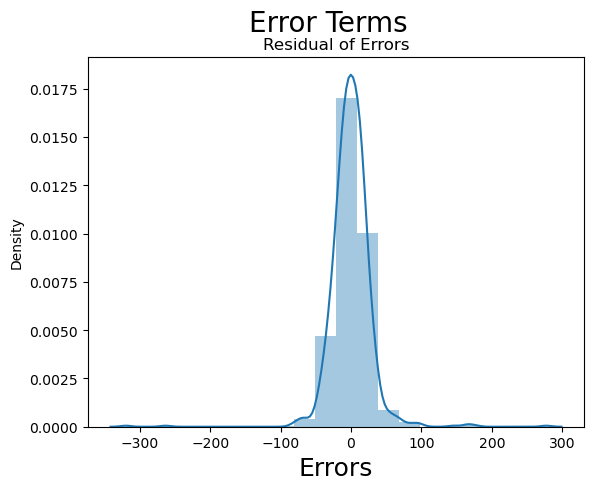

,Alpha,R-Squared,MSE,RMSE
0,0.0001,0.864394,847.465073,29.111253
1,0.0010,0.864394,847.465085,29.111254
2,0.0100,0.864394,847.466318,29.111275
3,0.1000,0.864377,847.571832,29.113087
4,1.0000,0.863746,851.515637,29.180741
5,10.0000,0.857973,887.591773,29.792478
6,100.0000,0.830777,1057.549863,32.519992
7,1000.0000,0.788154,1323.925221,36.385783
8,10000.0000,0.751374,1553.781377,39.418034


In [335]:
#run the ridge model with all variables 
rr05 = ridgeRegressionModel(X_train, 0.0001, X_train.columns, y_train)

# We got a very good model with: # R-squared = 0.84 
# Conclusion: But we can see there are some fields with very high coefficients 

#generating the result under different alphas
regResult = ridgeRegressionModelMultiAlpha(X_train, 0.0001, 10, 10000, X_train.columns, y_train)
regResult

# Next Action: In the next model lets try to remove those fields with high coeff and see if this makes a difference

#### Model - 6 - Ridge (drop columns 'RoofMatl_target','Utilities_target','Neighborhood_target','KitchenQual_target','BsmtExposure_target','BsmtQual_target','LotArea','LandContour_target','Condition1_target','Functional_target','Street_target','LotConfig_target','ExterQual_target')

---------------------------------------------
Alpha Value :  0.0001
---------------------------------------------
Mean_Squared_Error : 1170.1384502431415
r_square_value for the Model : 0.8127616746623174
Ridge coefficient :
---------------------------------------------
                 Feature  Coefficient
51       SaleType_target    22.411678
1            OverallQual    17.529926
22            GarageCars    13.729086
33       MSZoning_target    13.666051
35      LandSlope_target    12.395813
14          BsmtFullBath    11.523465
42   BsmtFinType1_target    11.101012
21            Fireplaces     6.039116
15          BsmtHalfBath     4.832867
39    Exterior1st_target     4.782718
38      RoofStyle_target     4.486967
34       LotShape_target     4.312954
44      HeatingQC_target     3.981027
47   GarageFinish_target     3.594649
40     Foundation_target     2.713563
16              FullBath     2.559558
50     PavedDrive_target     1.845649
20          TotRmsAbvGrd     1.455471
45     E

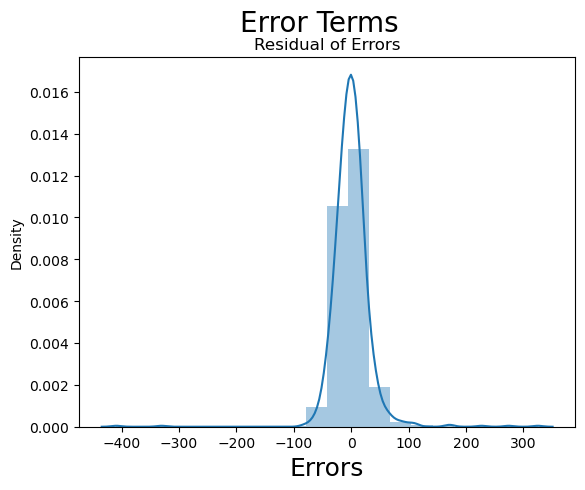

,Alpha,R-Squared,MSE,RMSE
0,0.0001,0.812762,1170.138450,34.207287
1,0.0010,0.812762,1170.138450,34.207287
2,0.0100,0.812762,1170.138472,34.207287
3,0.1000,0.812761,1170.140490,34.207316
4,1.0000,0.812743,1170.253526,34.208969
5,10.0000,0.812309,1172.968674,34.248630
6,100.0000,0.806699,1208.028629,34.756706
7,1000.0000,0.781989,1362.450409,36.911386
8,10000.0000,0.750369,1560.061957,39.497620


In [341]:
#Lets grab those support column in a feature list 
feature_cols_model06 = X_train.columns

columns_to_drop = ['RoofMatl_target','Utilities_target','Neighborhood_target','KitchenQual_target',
                   'BsmtExposure_target','BsmtQual_target','LotArea','LandContour_target','Condition1_target',
                   'Functional_target','Street_target','LotConfig_target','ExterQual_target'] 

feature_cols_model06 = feature_cols_model06.drop(columns_to_drop)

#run the ridge model with all variables 
rr06 = ridgeRegressionModel(X_train, 0.0001, feature_cols_model06, y_train)

# We got a very good model with: # R-squared = 0.81  
# Conclusion: But we can see there are some fields with very high coefficients 

#generating the result under different alphas
regResult = ridgeRegressionModelMultiAlpha(X_train, 0.0001, 10, 10000, feature_cols_model06, y_train)
regResult

#Final Conclusion : We can see from the table below that with different regularized values of Alpha the R-squared 
#                   remained very close. Therefore any amount of regulerization is not helping at this stage. 
#                   Hence we can consider this model #06 is most optimal model using Ridge. 

### Step 6.3: Building the linear model using Lasso regression with variaous lambdas
Our next step will be be to build a training model with the numeric and dummy variables (that we generated from 
various categories). We will use Lasso regression model for various lambdas and see the effect on the model. 

In [338]:
def lassoRegressionModel(train_dataset, alphaVal, columns, target):
    print('---------------------------------------------')
    print('Alpha Value : ', alphaVal)
    print('---------------------------------------------')
    lassoreg = Lasso(alpha = alphaVal)
    lassoreg.fit(train_dataset[columns], target)

    #determine predicted value
    y_pred = lassoreg.predict(train_dataset[columns])

    #compute mse, r2, and coeffs 
    mse = mean_squared_error(target, y_pred)
    lasso_coeffs = lassoreg.coef_
    r_squared = r2_score(target, y_pred)

    print('Mean_Squared_Error :', mse)
    print('r_square_value for the Model :', r_squared)

    print('Lasso coefficient :')
    print('---------------------------------------------')
    coeffienct_df = pd.DataFrame({'Feature': columns, 'Coefficient': lasso_coeffs})
    coeffienct_df = coeffienct_df.sort_values(by = 'Coefficient', ascending = False)

    pd.set_option('display.max_rows', None)
    print(coeffienct_df)

    #perform residual analysis
    print('Residual of Errors')
    print('---------------------------------------------')
    fig = plt.figure()
    sns.distplot((target - y_pred), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)                  
    plt.xlabel('Errors', fontsize = 18)  
    plt.title('Residual of Errors')
    plt.show()
    
    return lassoreg

def lassoRegressionModelMultiAlpha(train_dataset, beginAlpha, multiplier, maxAlpha, columns, target):
    #define a new dataframe
    lassoDf = pd.DataFrame(columns=['Alpha','R-Squared','MSE','RMSE'])
    
    #now loop thru various alphas 
    alphaVal = beginAlpha
    while alphaVal <= maxAlpha:
        #perform lasso
        lassoreg = Lasso(alpha = alphaVal)
        lassoreg.fit(train_dataset[columns], target)
        
        #determine predicted value
        y_pred = lassoreg.predict(train_dataset[columns])
        
        #compute the scores
        mse = mean_squared_error(target, y_pred)
        r_squared = r2_score(target, y_pred)
        rmse = mse**0.5
        
        #store the results
        data = {'Alpha': alphaVal, 'R-Squared': r_squared, 'MSE': mse, 'RMSE': rmse}
        lassoDf.loc[len(lassoDf.index)] = data
        
        #increase the alpha
        alphaVal = alphaVal*multiplier
    
    #return the computed dataframe 
    return lassoDf

#### Model - 7 - Lasso (feature - All)

---------------------------------------------
Alpha Value :  0.0001
---------------------------------------------
Mean_Squared_Error : 847.4651128098068
r_square_value for the Model : 0.8643938685446607
Lasso coefficient :
---------------------------------------------
                 Feature  Coefficient
46       RoofMatl_target    93.799632
38      Utilities_target    90.467671
41   Neighborhood_target    71.352206
57    KitchenQual_target    34.320958
52   BsmtExposure_target    30.698348
50       BsmtQual_target    27.969899
1                LotArea    25.184887
37    LandContour_target    20.114510
42     Condition1_target    17.559369
58     Functional_target    15.121429
35         Street_target    14.445950
39      LotConfig_target    13.016358
48      ExterQual_target    11.307750
64       SaleType_target     8.839669
15          BsmtFullBath     8.343841
2            OverallQual     8.124347
61     GarageQual_target     7.916985
23            GarageCars     7.830705
16       

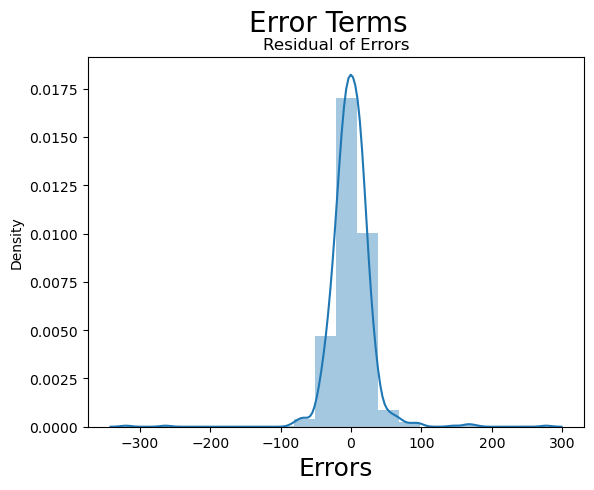

,Alpha,R-Squared,MSE,RMSE
0,0.0001,0.864394,847.465113,29.111254
1,0.0010,0.864393,847.469090,29.111322
2,0.0100,0.864332,847.853837,29.117930
3,0.1000,0.861258,867.061757,29.445912
4,1.0000,0.832084,1049.386092,32.394229
5,10.0000,0.768859,1444.506359,38.006662
6,100.0000,0.732663,1670.711667,40.874340
7,1000.0000,0.655139,2155.193077,46.424057
8,10000.0000,0.498850,3131.919325,55.963554


In [339]:
#run the lasso model with all variables 
rr07 = lassoRegressionModel(X_train, 0.0001, X_train.columns, y_train)

# We got a very good model with: # R-squared = 0.84 
# Conclusion: But we can see there are some fields with very high coefficients 

#generating the result under different alphas
lassoResult = lassoRegressionModelMultiAlpha(X_train, 0.0001, 10, 10000, X_train.columns, y_train)
lassoResult

# Next Action: In the next model lets try to remove those fields with high coeff and see if this makes a difference

#### Model - 8 - Lasso (feature - Dropped - 'RoofMatl_target','Utilities_target','Neighborhood_target','KitchenQual_target','BsmtExposure_target','BsmtQual_target','LotArea','LandContour_target','Condition1_target','Functional_target','Street_target','LotConfig_target','ExterQual_target','GarageCond_target')

---------------------------------------------
Alpha Value :  0.0001
---------------------------------------------
Mean_Squared_Error : 1173.356860346994
r_square_value for the Model : 0.8122466845618127
Lasso coefficient :
---------------------------------------------
                 Feature  Coefficient
50       SaleType_target    22.361293
1            OverallQual    17.489754
33       MSZoning_target    14.476495
22            GarageCars    13.320960
35      LandSlope_target    12.910631
14          BsmtFullBath    11.480872
42   BsmtFinType1_target    11.319266
21            Fireplaces     6.066941
39    Exterior1st_target     5.415599
15          BsmtHalfBath     4.810215
34       LotShape_target     4.713306
38      RoofStyle_target     4.683813
44      HeatingQC_target     3.897147
47   GarageFinish_target     3.501743
40     Foundation_target     2.873379
16              FullBath     2.624113
20          TotRmsAbvGrd     1.497982
45     Electrical_target     1.323135
49     Pa

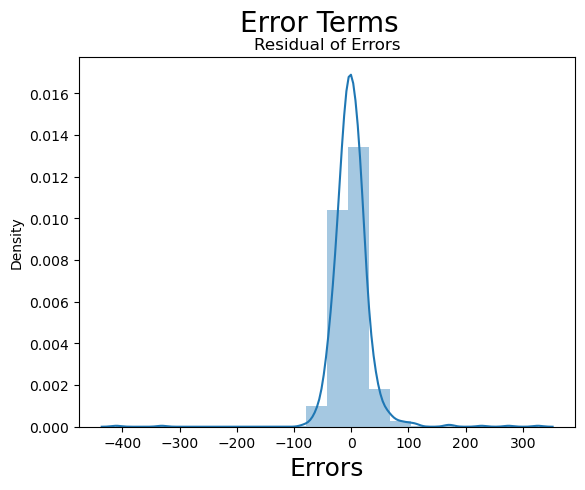

,Alpha,R-Squared,MSE,RMSE
0,0.0001,0.812247,1173.356860,34.254297
1,0.0010,0.812246,1173.358920,34.254327
2,0.0100,0.812236,1173.424619,34.255286
3,0.1000,0.811569,1177.593314,34.316080
4,1.0000,0.797424,1265.991150,35.580769
5,10.0000,0.768859,1444.506359,38.006662
6,100.0000,0.732663,1670.711667,40.874340
7,1000.0000,0.655139,2155.193077,46.424057
8,10000.0000,0.498850,3131.919325,55.963554


In [342]:
feature_cols_model8 = X_train.columns

columns_to_drop = ['RoofMatl_target','Utilities_target','Neighborhood_target','KitchenQual_target',
                   'BsmtExposure_target','BsmtQual_target','LotArea','LandContour_target',
                   'Condition1_target','Functional_target','Street_target','LotConfig_target',
                   'ExterQual_target','GarageCond_target'] 

feature_cols_model8 = feature_cols_model8.drop(columns_to_drop)

#run the lasso model with all variables 
las08 = lassoRegressionModel(X_train, 0.0001, feature_cols_model8, y_train)

# We got a very good model with: # R-squared = 0.84  
# Conclusion: There are some coefficients which are in double digits.  

#generating the result under different alphas
lassoResult = lassoRegressionModelMultiAlpha(X_train, 0.0001, 10, 10000, feature_cols_model8, y_train)
lassoResult

#Final Conclusion : We can see from the table below that with different regularized values of Alpha the R-squared 
#                   drops. Therefore any amount of regulerization is not helping at this stage. 
#                   Hene we can consider this model #8 is most optimal model using Ridge. 

### Step 7: Making Predictions Using the Final Model
Our next step is to make prediction using the models which we found apt. For this we will use:
- Model 4 that we derived using RFE technique
- Model 6 that we derived from Ridge technique
- Model 8 that we derived using Lasso techniqueue


In [344]:
housing_test.head()

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_target,KitchenQual_target,Functional_target,GarageType_target,GarageFinish_target,GarageQual_target,GarageCond_target,PavedDrive_target,SaleType_target,SaleCondition_target
1436,20,9000,4,1971,1971,0.0,616,0,248,864,...,186825.113193,139962.511565,183429.147059,134091.162791,142156.423140,187489.836003,187885.735294,186433.973881,173401.836622,175202.219533
57,60,11645,7,2004,2004,0.0,0,0,860,860,...,186825.113193,212116.023891,183429.147059,202892.656322,202068.869668,187489.836003,187885.735294,186433.973881,173401.836622,175202.219533
780,20,7875,7,1995,1996,38.0,0,0,1237,1237,...,186825.113193,139962.511565,183429.147059,202892.656322,240052.690341,187489.836003,187885.735294,186433.973881,173401.836622,175202.219533
382,60,9245,7,2006,2006,0.0,0,0,939,939,...,186825.113193,212116.023891,183429.147059,202892.656322,202068.869668,187489.836003,187885.735294,186433.973881,173401.836622,175202.219533
1170,80,9880,6,1977,1977,0.0,522,0,574,1096,...,186825.113193,139962.511565,183429.147059,202892.656322,240052.690341,187489.836003,187885.735294,186433.973881,173401.836622,175202.219533


In [345]:
#Scaling the target variable in 1000s. 
housing_test['SalePrice'] = housing_test['SalePrice'] / 1000

features_to_scale = ['LotArea','MSZoning_target','Street_target','LotShape_target','LandContour_target',
                     'Utilities_target','LotConfig_target','LandSlope_target','Neighborhood_target',
                     'Condition1_target','BldgType_target','HouseStyle_target','RoofStyle_target',
                     'RoofMatl_target','Exterior1st_target','ExterQual_target','Foundation_target',
                     'BsmtQual_target','BsmtCond_target','BsmtExposure_target','BsmtFinType1_target',
                     'Heating_target','HeatingQC_target','Electrical_target','KitchenQual_target',
                     'Functional_target','GarageType_target','GarageFinish_target','GarageQual_target',
                     'GarageCond_target','PavedDrive_target','SaleType_target','SaleCondition_target']

#scaling the predictors
scaleMinMax(features_to_scale, housing_test)
housing_test.head()

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_target,KitchenQual_target,Functional_target,GarageType_target,GarageFinish_target,GarageQual_target,GarageCond_target,PavedDrive_target,SaleType_target,SaleCondition_target
1436,20,0.048827,4,1971,1971,0.0,616,0,248,864,...,1.0,0.115386,1.0,0.202411,0.283135,0.935287,1.0,1.0,0.204243,0.22795
57,60,0.065599,7,2004,2004,0.0,0,0,860,860,...,1.0,0.453920,1.0,0.657512,0.721856,0.935287,1.0,1.0,0.204243,0.22795
780,20,0.041693,7,1995,1996,38.0,0,0,1237,1237,...,1.0,0.115386,1.0,0.657512,1.000000,0.935287,1.0,1.0,0.204243,0.22795
382,60,0.050380,7,2006,2006,0.0,0,0,939,939,...,1.0,0.453920,1.0,0.657512,0.721856,0.935287,1.0,1.0,0.204243,0.22795
1170,80,0.054407,6,1977,1977,0.0,522,0,574,1096,...,1.0,0.115386,1.0,0.657512,1.000000,0.935287,1.0,1.0,0.204243,0.22795


In [346]:
# we will need the target variable for all of our regression models. Hence storing that before hand
y_test = housing_test.pop('SalePrice')

# we will keep using columns from our X_train which contains our feature variables 
X_test = housing_test

#### Step 7.1: Making prediction on test data using Model 4

In [347]:
X_test.head()

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_target,KitchenQual_target,Functional_target,GarageType_target,GarageFinish_target,GarageQual_target,GarageCond_target,PavedDrive_target,SaleType_target,SaleCondition_target
1436,20,0.048827,4,1971,1971,0.0,616,0,248,864,...,1.0,0.115386,1.0,0.202411,0.283135,0.935287,1.0,1.0,0.204243,0.22795
57,60,0.065599,7,2004,2004,0.0,0,0,860,860,...,1.0,0.453920,1.0,0.657512,0.721856,0.935287,1.0,1.0,0.204243,0.22795
780,20,0.041693,7,1995,1996,38.0,0,0,1237,1237,...,1.0,0.115386,1.0,0.657512,1.000000,0.935287,1.0,1.0,0.204243,0.22795
382,60,0.050380,7,2006,2006,0.0,0,0,939,939,...,1.0,0.453920,1.0,0.657512,0.721856,0.935287,1.0,1.0,0.204243,0.22795
1170,80,0.054407,6,1977,1977,0.0,522,0,574,1096,...,1.0,0.115386,1.0,0.657512,1.000000,0.935287,1.0,1.0,0.204243,0.22795


In [348]:
#take the same columns that we used in model 8 
X_test_m7 = X_test[feature_cols_model04]

# Adding a constant variable 
X_test_m7 = sm.add_constant(X_test_m7)

#make prediction with the lr07 model
y_pred_m7 = lr04.predict(X_test_m7)

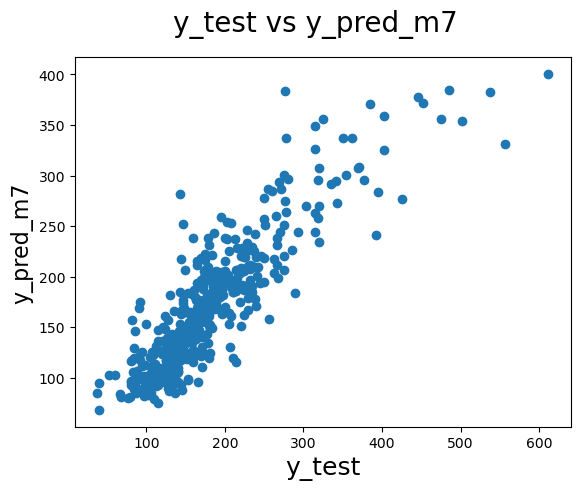

In [349]:
# Plotting y_test and y_pred_m7 to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m7)
fig.suptitle('y_test vs y_pred_m7', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred_m7', fontsize=16)   
plt.show()

In [352]:
#Check the MSE and r-square scores
mse = mean_squared_error(y_test, y_pred_m7)
r_squared = r2_score(y_test, y_pred_m7)

print('Mean_Squared_Error on test data using Model 4:', mse)
print('r_square_value on test data using Model 4:', r_squared)

#We can see the r-squared is same as what was determined for model 4 during training

Mean_Squared_Error on test data using Model 4: 1633.3755338833812
r_square_value on test data using Model 4: 0.7461896251789798


#### Step 7.2: Making prediction with Ridge on test data using Model 6

---------------------------------------------
Alpha Value :  0.0001
---------------------------------------------
Mean_Squared_Error : 825.2460834430483
r_square_value for the Model : 0.8717649349991956
Ridge coefficient :
---------------------------------------------
                 Feature  Coefficient
51       SaleType_target    27.845646
34       LotShape_target    19.500471
52  SaleCondition_target    18.256722
1            OverallQual    15.401151
33       MSZoning_target    13.683681
35      LandSlope_target    13.081616
38      RoofStyle_target    12.226264
39    Exterior1st_target    11.745546
44      HeatingQC_target    10.314656
22            GarageCars     8.813108
20          TotRmsAbvGrd     6.629611
40     Foundation_target     4.981830
9             CentralAir     3.653439
15          BsmtHalfBath     3.536097
50     PavedDrive_target     3.509219
21            Fireplaces     2.788057
32                YrSold     1.924351
42   BsmtFinType1_target     1.919657
3        

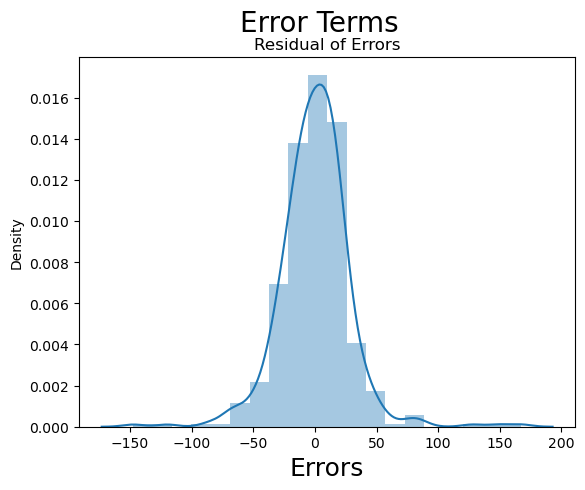

,Alpha,R-Squared,MSE,RMSE
0,0.0001,0.871765,825.246083,28.727097
1,0.0010,0.871765,825.246084,28.727097
2,0.0100,0.871765,825.246134,28.727098
3,0.1000,0.871764,825.250998,28.727182
4,1.0000,0.871706,825.626071,28.733710
5,10.0000,0.869580,839.309094,28.970832
6,100.0000,0.849973,965.489473,31.072326
7,1000.0000,0.810576,1219.020945,34.914480
8,10000.0000,0.794085,1325.151601,36.402632


In [353]:
#run the ridge model with all variables 
rr06_test = ridgeRegressionModel(X_test, 0.0001, feature_cols_model06, y_test)

#generating the result under different alphas
regResult = ridgeRegressionModelMultiAlpha(X_test, 0.0001, 10, 10000, feature_cols_model06, y_test)
regResult

# We got almost similar r-squared for the test data under ridge regression as well

#### Step 7.2: Making prediction with Lasso on test data using Model 8

---------------------------------------------
Alpha Value :  0.0001
---------------------------------------------
Mean_Squared_Error : 825.3606301820478
r_square_value for the Model : 0.8717471355708603
Lasso coefficient :
---------------------------------------------
                 Feature  Coefficient
50       SaleType_target    27.846598
34       LotShape_target    19.452451
51  SaleCondition_target    18.239368
1            OverallQual    15.369753
33       MSZoning_target    13.662058
35      LandSlope_target    13.204690
38      RoofStyle_target    12.226829
39    Exterior1st_target    11.874126
44      HeatingQC_target    10.273612
22            GarageCars     8.662425
20          TotRmsAbvGrd     6.633190
40     Foundation_target     5.000981
9             CentralAir     3.574482
15          BsmtHalfBath     3.477366
49     PavedDrive_target     3.324158
21            Fireplaces     2.799208
42   BsmtFinType1_target     1.938961
32                YrSold     1.912537
3        

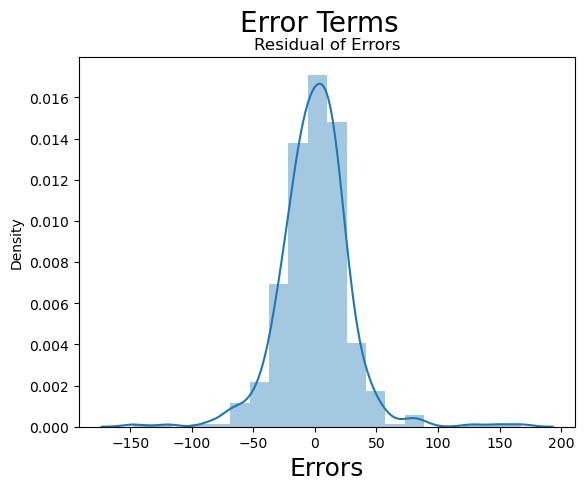

,Alpha,R-Squared,MSE,RMSE
0,0.0001,0.871747,825.360630,28.729090
1,0.0010,0.871747,825.361423,28.729104
2,0.0100,0.871735,825.440689,28.730484
3,0.1000,0.870940,830.555742,28.819364
4,1.0000,0.853114,945.270842,30.745257
5,10.0000,0.798353,1297.682381,36.023359
6,100.0000,0.783196,1395.221073,37.352658
7,1000.0000,0.726151,1762.335099,41.980175
8,10000.0000,0.548374,2906.399797,53.911036


In [355]:
#run the ridge model with all variables 
lasr08_test = lassoRegressionModel(X_test, 0.0001, feature_cols_model8, y_test)

#generating the result under different alphas
lassoResult = lassoRegressionModelMultiAlpha(X_test, 0.0001, 10, 10000, feature_cols_model8, y_test)
lassoResult

# We got almost similar r-squared for the test data under ridge regression as well

---------------------------------------------
Alpha Value :  0.0001
---------------------------------------------
Mean_Squared_Error : 1058.072656350983
r_square_value for the Model : 0.8355859923664748
Lasso coefficient :
---------------------------------------------
                Feature  Coefficient
40       Heating_target    20.112689
41     HeatingQC_target    18.955526
35     RoofStyle_target    15.148969
21           GarageCars    12.019159
19         TotRmsAbvGrd     8.798428
36   Exterior1st_target     8.465330
32     LandSlope_target     7.771789
20           Fireplaces     5.636198
37    Foundation_target     5.520126
44  GarageFinish_target     5.202777
39  BsmtFinType1_target     4.413416
38      BsmtCond_target     2.479497
16             HalfBath     1.779997
14         BsmtHalfBath     1.436842
15             FullBath     1.036096
2          YearRemodAdd     0.432099
30               MoSold     0.322988
31               YrSold     0.250143
1             YearBuilt     

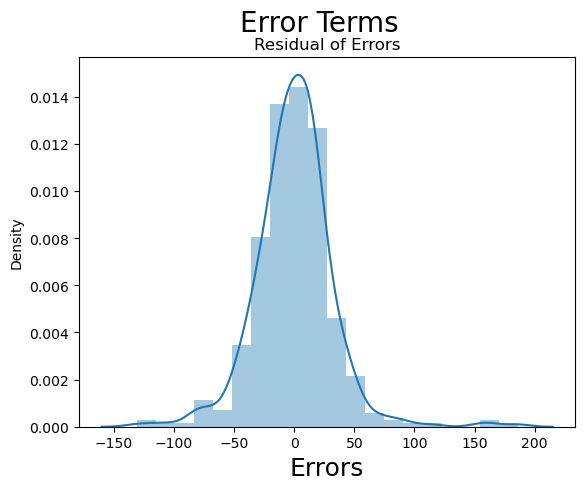

,Alpha,R-Squared,MSE,RMSE
0,0.0001,0.835586,1058.072656,32.528029
1,0.0010,0.835586,1058.073440,32.528041
2,0.0100,0.835574,1058.151800,32.529245
3,0.1000,0.834596,1064.442112,32.625789
4,1.0000,0.818203,1169.939790,34.204383
5,10.0000,0.791495,1341.815932,36.630806
6,100.0000,0.783196,1395.221073,37.352658
7,1000.0000,0.726151,1762.335099,41.980175
8,10000.0000,0.548374,2906.399797,53.911036


In [360]:
### Test
feature_cols_model8_test = feature_cols_model8
feature_cols_model8_test
columns_to_drop = ['SaleType_target','LotShape_target','SaleCondition_target','OverallQual','MSZoning_target'] 

feature_cols_model8_test = feature_cols_model8_test.drop(columns_to_drop)

#run the ridge model with all variables 
lasr09_test = lassoRegressionModel(X_test, 0.0001, feature_cols_model8_test, y_test)

#generating the result under different alphas
lassoResult = lassoRegressionModelMultiAlpha(X_test, 0.0001, 10, 10000, feature_cols_model8_test, y_test)
lassoResult